### 相关库的导入

In [11]:
import numpy as np  # numpy库用于科学计算
import pandas as pd  # pandas库用于处理csv数据文件
import matplotlib.pyplot as plt  # pyplot库用于绘制图标

### csv文件读取的函数

In [12]:
def load_data(csv_file):
    # 该函数用于读取csv文件中的数据import numpy as np  # numpy库用于科学计算
    # import pandas as pd  # pandas库用于处理csv数据文件
    # import matplotlib.pyplot as plt  # pyplot库用于绘制图标

    data = pd.read_csv(csv_file)  # 读取csv文件
    X = data.iloc[:, 0].values  # 提取第一列
    Y = data.iloc[:, 1].values  # 提取第二列
    return X, Y

In [13]:
### 实现局部加权线性回归预测的函数

In [14]:
def lwlr(test_point, X, Y, tau):
    # 该函数用于实现局部加权线性回归预测    test_point: 带预测的x值  X: 训练数据的X值  Y: 训练数据的Y值  tau: 带宽参数, 用于控制权重的衰减速度

    m = X.shape[0]  # 训练数据中的样本数量
    # 构建设计矩阵（添加截距项）
    X_mat = np.vstack((np.ones(m), X)).T  # 构建了设计矩阵, 第一列是1, 第二列是X特征列
    diff = X - test_point  # 计算每个样本和测试点的横轴距离
    weights = np.exp(- (diff ** 2) / (2 * tau ** 2))  # 通过高斯核函数来计算权重
    W = np.diag(weights)  # 构建对角权重矩阵
    XT_W = X_mat.T @ W  # 计算加权后的特征矩阵
    theta = np.linalg.pinv(XT_W @ X_mat) @ XT_W @ Y  # 使用正规方程计算参数θ
    y_pred = theta[0] + theta[1] * test_point  # 用计算出的参数θ来预测y值
    return y_pred


In [15]:
### 对多个测试点进行局部加权线性回归预测的函数

In [16]:
def lwlr_predict(X_test, X_train, Y_train, tau):
    #  对多个测试点进行局部加权线性回归的预测    X_test: 测试点的X值数组  X_train: 训练数据的X值  Y_train: 训练数据的Y值  tau: 带宽参数

    y_pred = np.array([lwlr(x, X_train, Y_train, tau) for x in X_test])  # 遍历X_test中的每个测试点，用lwlr方法进行预测
    return y_pred

In [17]:
### 绘制训练数据的散点和LWLR的拟合结果

In [18]:
def plot_results(X_train, Y_train, X_test, Y_pred):
    #  绘制训练数据散点和LWLR的拟合结果    X_train: 训练数据的X值  Y_train: 训练数据的Y值  X_test: 测试数据的X值  Y_pred: 预测的Y值

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='blue', label='Training Data')
    plt.plot(X_test, Y_pred, color='red', label='LWLR Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Locally Weighted Linear Regression')
    plt.legend()
    plt.show()

In [19]:
## 主函数

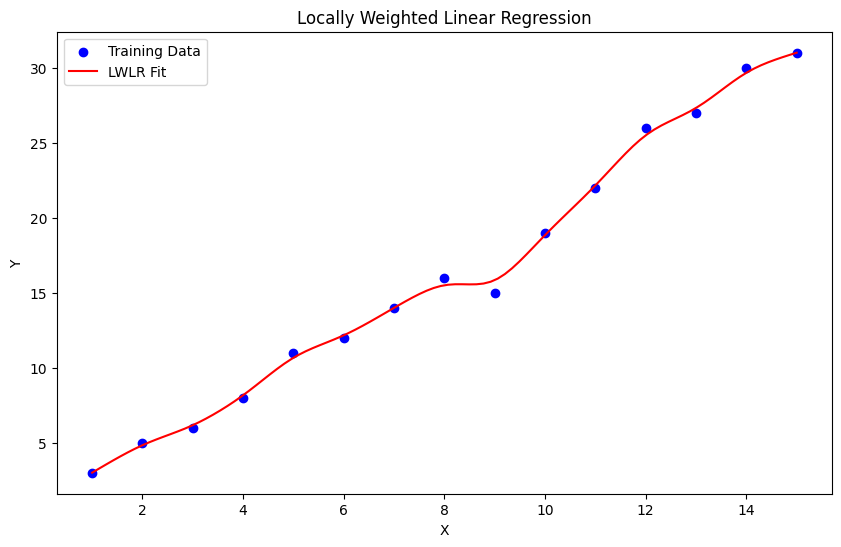

In [24]:
def main():
    # 配置
    csv_file = r'C:\Users\Lamarck\Desktop\Locally Weighted Linear Regression.csv'  # 训练数据集的路径
    tau = 0.6  # 定义带宽参数

    # 加载数据
    X, Y = load_data(csv_file)

    # 生成测试点（用于绘图）
    X_test = np.linspace(X.min(), X.max(), 100)  # 从X的最小值到最大值, 生成100个均匀测试点
    Y_pred = lwlr_predict(X_test, X, Y, tau)  # 对测试点进行预测

    # 可视化
    plot_results(X, Y, X_test, Y_pred)

if __name__ == "__main__":
    main()